# TABLE OF CONTENTS

1. [Introduction](#introduction)
2. [Players Position and Age distribution of players ](#analysis)
3.  [Points per game  ](#ppg)
4.  [Assists per game](#apg)
5.  [ Field goal average per game ](#fgpg)
6.  [Rebounds per game ](#rpg)
7.  [Turnover per game](#tpg)
8. [2 points average per game](#twoppg)
9. [3 points average per game](#threeppg)
10. [Dribbles per game](#dpg)
11. [Players career length](#lengthycareer)
12. [Top 10 best players of NBA ](#best)
13. [State which produced most NBA players ](#state)
14. [Wordcloud for players colleges](#colleges)
15. [Deep learning for predicting PPG of players](#keras)
16.  [Conclusion](#conclusion)

# Introduction
<a id="introduction" ></a>
 **National Basketball Association (NBA) is a men's professional basketball league in North America; composed of 30 teams (29 in the United States and 1 in Canada). It is widely considered to be the premier men's professional basketball league in the world. The NBA is an active member of USA Basketball (USAB), which is recognized by FIBA (also known as the International Basketball Federation) as the national governing body for basketball in the United States. The NBA is one of the four major professional sports leagues in the United States and Canada. NBA players are the world's best paid athletes by average annual salary per player.**

**The league was founded in New York City on June 6, 1946, as the Basketball Association of America (BAA). The league adopted the name National Basketball Association on August 3, 1949, after merging with the competing National Basketball League (NBL). The league's several international as well as individual team offices are directed out of its head offices located in the Olympic Tower at 645 Fifth Avenue in Manhattan. NBA Entertainment and NBA TV studios are directed out of offices located in Secaucus, New Jersey.**

![](https://cdn.nba.net/nba-drupal-prod/2017-08/SEO-image-NBA-logoman.jpg)

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff


In [2]:
players = pd.read_csv('Players.csv')
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [3]:
players_data = pd.read_csv('player_data.csv')
players_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [4]:
players_data.rename(columns={'name': 'Player'}, inplace=True)

In [5]:
players_data= players_data.fillna('No College')

In [6]:
final_df = pd.read_csv('Seasons_Stats.csv')
final_df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [7]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]  # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(columnDf.dtype, np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar(color='skyblue', edgecolor='black')
            plt.xlabel('Categories')
        else:
            columnDf.hist(color='skyblue', edgecolor='black')
            plt.xlabel('Values')
        plt.ylabel('Counts')
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Distribution of {columnNames[i]} (Column {i})')
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# Players position and age distribution
<a id="analysis" ></a>

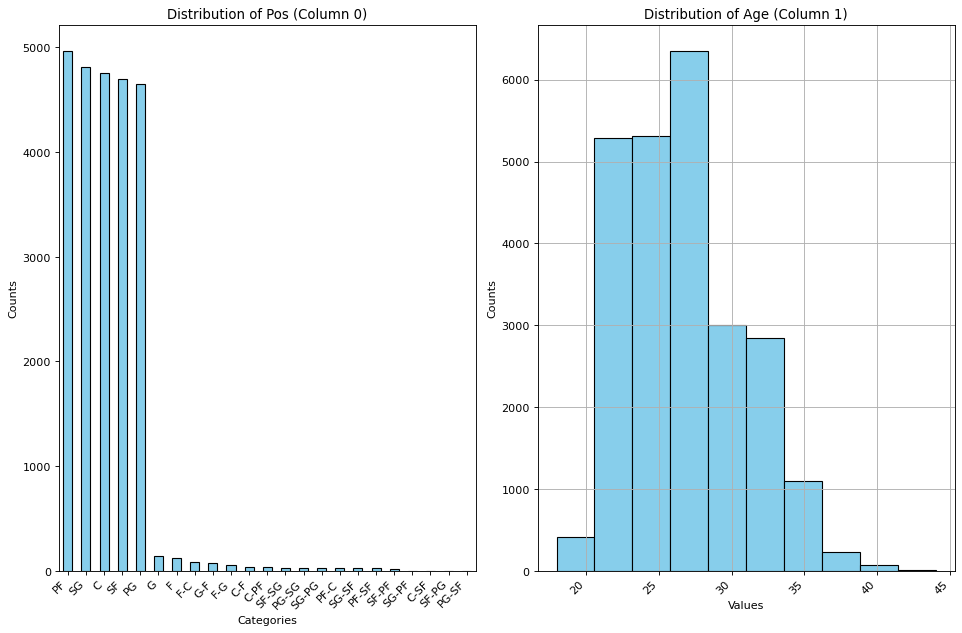

In [8]:
plotPerColumnDistribution(final_df, 84, 10)

**The  five basketball positions normally employed by organized basketball teams are the point guard (PG), the shooting guard (SG), the small forward (SF), the power forward (PF), and the center (C).**
![](https://upload.wikimedia.org/wikipedia/commons/a/ac/Basketball_Positions.png)

**Most players age lies into their 20s as that's when they get drafted or hit the prime into NBA. **

In [9]:
def random_colors(number_of_colors):
    colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)])
              for _ in range(number_of_colors)]
    return colors

# Ensure PTS and G are numeric
final_df['PTS'] = pd.to_numeric(final_df['PTS'], errors='coerce')
final_df['G'] = pd.to_numeric(final_df['G'], errors='coerce')

# Calculate PPG
final_df['ppg'] = final_df['PTS'] / final_df['G']

# Filter out rows with NaN values in 'ppg'
final_df = final_df.dropna(subset=['ppg'])

# Group by Player and calculate mean PPG
ppg = final_df.groupby('Player', as_index=False)['ppg'].mean()

# Sort by PPG and get top 10 players
ppg = ppg.sort_values('ppg', ascending=False).head(10)

# Display the results
print(ppg)

                 Player        ppg
3883  Wilt Chamberlain*  30.646578
2684    Michael Jordan*  29.444797
2403       LeBron James  27.121076
2271       Kevin Durant  27.029466
1882        Jerry West*  26.741316
1434     George Gervin*  26.180839
390         Bob Pettit*  26.177270
2898   Oscar Robertson*  25.526368
1249      Elgin Baylor*  25.275389
570     Carmelo Anthony  24.884033


# Points per game 


In [10]:
import random
trace0 = go.Bar(
    x=ppg['Player'].head(10),
    y=ppg['ppg'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high points per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [11]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wilt Chamberlain*'],
    y = final_df.ppg[final_df.Player == 'Wilt Chamberlain*'],
    name = 'Wilt Chamberlain',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Michael Jordan*'],
    y = final_df.ppg[final_df.Player == 'Michael Jordan*'],
    name = 'Michael Jordan',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.ppg[final_df.Player == 'LeBron James'],
    name = 'LeBron James',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Kevin Durant'],
    y = final_df.ppg[final_df.Player == 'Kevin Durant'],
    name = 'Kevin Durant',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Jerry West*'],
    y = final_df.ppg[final_df.Player == 'Jerry West*'],
    name = 'Jerry West',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'George Gervin*'],
    y = final_df.ppg[final_df.Player == 'George Gervin*'],
    name = 'George Gervin',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Bob Pettit'],
    y = final_df.ppg[final_df.Player == 'Bob Pettit'],
    name = 'Bob Pettit',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Oscar Robertson*'],
    y = final_df.ppg[final_df.Player == 'Oscar Robertson*'],
    name = 'Oscar Robertson',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data1 = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Points per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'PPG'),
              )

fig = dict(data=data1, layout=layout)
py.iplot(fig, filename='styled-line')

**Wilt Chamberlain is regarded as one of the most dominant scorers in the NBA history. Known as the first and only player to score 100 points in a single NBA game, he was a two time NBA Champion(1967,1972) and was a four-time NBA MVP.**

**Chamberlain attended High school at Overbrook and went to college at the University of Kansas. He was selected as a territorial pick in the 1959 NBA Draft by the Philadelphia Warriors and won Rookie of the Year award. He holds numerous NBA records, which are nearly impossible to break.**

**Wilt Chamberlain won seven scoring titles, which is the second most of all time and has an incredible 30.07 points per game average with 31,419 points scored in 1045 games played. He also holds a record for most points scored in a single season with an average of 50.36 points per game.****

In [12]:
import pandas as pd
import numpy as np

# Ensure AST and G are numeric
final_df['AST'] = pd.to_numeric(final_df['AST'], errors='coerce')
final_df['G'] = pd.to_numeric(final_df['G'], errors='coerce')

# Calculate APG
final_df['apg'] = final_df['AST'] / final_df['G']

# Filter out rows with NaN values in 'apg'
final_df = final_df.dropna(subset=['apg'])

# Group by Player and calculate mean APG
apg = final_df.groupby('Player', as_index=False)['apg'].mean()

# Sort by APG and get top 10 players
apg = apg.sort_values('apg', ascending=False).head(10)

# Display the results
print(apg)


                Player        apg
2506    Magic Johnson*  10.920174
2072    John Stockton*  10.434039
669         Chris Paul   9.884820
2898  Oscar Robertson*   9.451219
1642     Isiah Thomas*   9.188279
2082         John Wall   9.097141
1778        Jason Kidd   8.812195
3040       Rajon Rondo   8.787745
3174       Ricky Rubio   8.439629
2866        Norm Nixon   8.248750


# Assists per game

In [13]:
trace0 = go.Bar(
    x=apg['Player'].head(10),
    y=apg['apg'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high assists per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [14]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Magic Johnson*'],
    y = final_df.apg[final_df.Player == 'Magic Johnson*'],
    name = 'Magic Johnson',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'John Stockton*'],
    y = final_df.apg[final_df.Player == 'John Stockton*'],
    name = 'John Stockton',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Oscar Robertson*'],
    y = final_df.apg[final_df.Player == 'Oscar Robertson*'],
    name = 'Oscar Robertson',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Chris Paul'],
    y = final_df.apg[final_df.Player == 'Chris Paul'],
    name = 'Chris Paul',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Isiah Thomas*'],
    y = final_df.apg[final_df.Player == 'Isiah Thomas*'],
    name = 'Isiah Thomas',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'John Wall'],
    y = final_df.apg[final_df.Player == 'John Wall'],
    name = 'John Wall',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Jason Kidd'],
    y = final_df.apg[final_df.Player == 'Jason Kidd'],
    name = 'Jason Kidd',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Rajon Rondo'],
    y = final_df.apg[final_df.Player == 'Rajon Rondo'],
    name = 'Rajon Rondo',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Assists per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'APG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

**Earvin "Magic" Johnson Jr. (born August 14, 1959) is an American retired professional basketball player and current president of basketball operations of the Los Angeles Lakers of the National Basketball Association (NBA). He played point guard for the Lakers for 13 seasons. After winning championships in high school and college, Johnson was selected first overall in the 1979 NBA draft by the Lakers. He won a championship and an NBA Finals Most Valuable Player Award in his rookie season, and won four more championships with the Lakers during the 1980s. Johnson retired abruptly in 1991 after announcing that he had contracted HIV, but returned to play in the 1992 All-Star Game, winning the All-Star MVP Award. After protests from his fellow players, he retired again for four years, but returned in 1996, at age 36, to play 32 games for the Lakers before retiring for the third and final time.**

**Johnson's career achievements include three NBA MVP Awards, nine NBA Finals appearances, twelve All-Star games, and ten All-NBA First and Second Team nominations. He led the league in regular-season assists four times, and is the NBA's all-time leader in average assists per game, at 11.2. Johnson was a member of the 1992 United States men's Olympic basketball team ("The Dream Team"), which won the Olympic gold medal in 1992. After leaving the NBA in 1992, Johnson formed the Magic Johnson All-Stars, a barnstorming team that travelled around the world playing exhibition games Johnson was honored as one of the 50 Greatest Players in NBA History in 1996.**

In [15]:
import pandas as pd
import numpy as np

# Ensure FG and G are numeric
final_df['FG'] = pd.to_numeric(final_df['FG'], errors='coerce')
final_df['G'] = pd.to_numeric(final_df['G'], errors='coerce')

# Calculate FGPG
final_df['fgpg'] = final_df['FG'] / final_df['G']

# Filter out rows with NaN values in 'fgpg'
final_df = final_df.dropna(subset=['fgpg'])

# Group by Player and calculate mean FGPG
fgpg = final_df.groupby('Player', as_index=False)['fgpg'].mean()

# Sort by FGPG and get top 10 players
fgpg = fgpg.sort_values('fgpg', ascending=False).head(10)

# Display the results
print(fgpg)


                    Player       fgpg
3883     Wilt Chamberlain*  12.422095
2684       Michael Jordan*  11.096297
1434        George Gervin*  10.172494
2184  Kareem Abdul-Jabbar*  10.147897
2403          LeBron James   9.824404
1882           Jerry West*   9.584016
1249         Elgin Baylor*   9.523007
2362           Larry Bird*   9.398800
390            Bob Pettit*   9.208676
2271          Kevin Durant   9.171320


# Field goal per game

In [16]:
trace0 = go.Bar(
    x=fgpg['Player'].head(10),
    y=fgpg['fgpg'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high field goal per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [17]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wilt Chamberlain*'],
    y = final_df.fgpg[final_df.Player == 'Wilt Chamberlain*'],
    name = 'Wilt Chamberlain',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Michael Jordan*'],
    y = final_df.fgpg[final_df.Player == 'Michael Jordan*'],
    name = 'Michael Jordan',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'George Gervin*'],
    y = final_df.fgpg[final_df.Player == 'George Gervin*'],
    name = 'George Gervin',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Kareem Abdul-Jabbar*'],
    y = final_df.fgpg[final_df.Player == 'Kareem Abdul-Jabbar*'],
    name = 'Kareem Abdul-Jabbar',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.fgpg[final_df.Player == 'LeBron James'],
    name = 'LeBron James ',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Jerry West*'],
    y = final_df.fgpg[final_df.Player == 'Jerry West*'],
    name = 'Jerry West',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Larry Bird*'],
    y = final_df.fgpg[final_df.Player == 'Larry Bird*'],
    name = 'Larry Bird',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Bob Pettit*'],
    y = final_df.fgpg[final_df.Player == 'Bob Pettit*'],
    name = 'Bob Pettit',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Field Goal average per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

**Chamberlain holds numerous NBA records in scoring, rebounding, and durability categories. He is the only player to score 100 points in a single NBA game or average more than 40 and 50 points in a season. He won seven scoring, eleven rebounding, nine field goal percentage titles and led the league in assists once. Chamberlain is the only player in NBA history to average at least 30 points and 20 rebounds per game in a season, which he accomplished seven times. He is also the only player to average at least 30 points and 20 rebounds per game over the entire course of his NBA career. Although he suffered a long string of professional losses, Chamberlain had a successful career, winning two NBA championships, earning four regular-season Most Valuable Player awards, the Rookie of the Year award, one NBA Finals MVP award, and was selected to 13 All-Star Games and ten All-NBA First and Second teams. He was subsequently enshrined in the Naismith Memorial Basketball Hall of Fame in 1978, elected into the NBA's 35th Anniversary Team of 1980, and chosen as one of the 50 Greatest Players in NBA History of 1996.**

In [18]:
# Ensure TRB and G are numeric
final_df['TRB'] = pd.to_numeric(final_df['TRB'], errors='coerce')
final_df['G'] = pd.to_numeric(final_df['G'], errors='coerce')

# Calculate RPG
final_df['rpg'] = final_df['TRB'] / final_df['G']

# Filter out rows with NaN values in 'rpg'
final_df = final_df.dropna(subset=['rpg'])

# Group by Player and calculate mean RPG
rpg = final_df.groupby('Player', as_index=False)['rpg'].mean()

# Sort by RPG and get top 10 players
rpg = rpg.sort_values('rpg', ascending=False).head(10)

# Display the results
print(rpg)

                 Player        rpg
3782  Wilt Chamberlain*  22.704842
297       Bill Russell*  22.383754
2556    Maurice Stokes*  17.299929
377         Bob Pettit*  16.098956
1812       Jerry Lucas*  15.085339
2732     Nate Thurmond*  13.952825
3740        Wes Unseld*  13.850343
959      Dennis Rodman*  13.360166
870        Dave Cowens*  13.212907
1401      George Mikan*  12.921460


# Rebounds per game

In [19]:
trace0 = go.Bar(
    x=rpg['Player'].head(10),
    y=rpg['rpg'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high rebounds per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [20]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wilt Chamberlain*'],
    y = final_df.rpg[final_df.Player == 'Wilt Chamberlain*'],
    name = 'Wilt Chamberlain',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Bill Russell*'],
    y = final_df.rpg[final_df.Player == 'Bill Russell*'],
    name = 'Bill Russell',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Maurice Stokes*'],
    y = final_df.rpg[final_df.Player == 'Maurice Stokes*'],
    name = 'Maurice Stokes',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Bob Pettit*'],
    y = final_df.rpg[final_df.Player == 'Bob Pettit*'],
    name = 'Bob Pettit',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Jerry Lucas*'],
    y = final_df.rpg[final_df.Player == 'Jerry Lucas*'],
    name = 'Jerry Lucas ',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Nate Thurmond*'],
    y = final_df.rpg[final_df.Player == 'Nate Thurmond*'],
    name = 'Nate Thurmond',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dennis Rodman*'],
    y = final_df.rpg[final_df.Player == 'Dennis Rodman*'],
    name = 'Dennis Rodman',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dave Cowens*'],
    y = final_df.rpg[final_df.Player == 'Dave Cowens*'],
    name = 'Dave Cowens*',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Rebounds per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

**From a historical NBA perspective, the rivalry between Chamberlain and his perennial nemesis Bill Russell is cited as the greatest on-court rivalry of all time. There were three NBA Finals matchups in the rivalry between Larry Bird and Magic Johnson, but they played different positions and did not guard each other. Russell's Celtics won seven of eight playoff series against Chamberlain's Warriors, 76ers, and Lakers teams, and went 57–37 against them in the regular season and 29–20 in the playoffs. Russell's teams won all four seventh games against Chamberlain's—the combined margin was nine points. Chamberlain outscored Russell 30 to 14.2 per game and outrebounded him 28.2 to 22.9 in the regular season, and also in the playoffs, he outscored him 25.7 to 14.9 and outrebounded him 28 to 24.7. The comparison between the two is often simplified to a great player (Chamberlain) versus a player who makes his team great (Russell), an individualist against a team player. In 1961–62 when Chamberlain averaged 50.4 points per game, he noted that Boston did not rely on Russell's scoring, and he could concentrate on defense and rebounding. He wished people would understand that their roles were different. Chamberlain said, "I've got to hit forty points or so, or this team is in trouble. I must score—understand? After that I play defense and get the ball off the boards. I try to do them all, best I can, but scoring comes first." Russell won 11 NBA titles in his career while Chamberlain won two. Chamberlain was named All-NBA first team seven times to Russell's three, but Russell was named league MVP—then selected by players and not the press—five times against Chamberlain's four. Russell and Chamberlain were friends in private life. Russell never considered Chamberlain his rival and disliked the term, instead pointing out that they rarely talked about basketball when they were alone. When Chamberlain died in 1999, Chamberlain's nephew stated that Russell was the second person he was ordered to break the news to.The two did not speak for two decades after Russell criticized Chamberlain after Game 7 of the 1969 Finals. Russell apologized privately to him and later publicly.**

In [21]:
# Ensure TOV and G are numeric
final_df['TOV'] = pd.to_numeric(final_df['TOV'], errors='coerce')
final_df['G'] = pd.to_numeric(final_df['G'], errors='coerce')

# Calculate TPG
final_df['tpg'] = final_df['TOV'] / final_df['G']

# Filter out rows with NaN values in 'tpg'
final_df = final_df.dropna(subset=['tpg'])

# Group by Player and calculate mean TPG
tpg = final_df.groupby('Player', as_index=False)['tpg'].mean()

# Sort by TPG and get top 10 players
tpg = tpg.sort_values('tpg', ascending=False).head(10)

# Display the results
print(tpg)

                 Player       tpg
2432  Russell Westbrook  3.924140
1808     Magic Johnson*  3.847099
1461          John Wall  3.795269
1411        Joel Embiid  3.774194
1161      Isiah Thomas*  3.759299
1026    George McGinnis  3.546819
701    DeMarcus Cousins  3.531418
1733       LeBron James  3.418573
72       Allen Iverson*  3.413669
1970        Micheal Ray  3.380998


# Turnover per game

In [22]:
trace0 = go.Bar(
    x=tpg['Player'].head(10),
    y=tpg['tpg'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high turnover per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [23]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Russell Westbrook'],
    y = final_df.tpg[final_df.Player == 'Russell Westbrook'],
    name = 'Russell Westbrook',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Magic Johnson*'],
    y = final_df.tpg[final_df.Player == 'Magic Johnson*'],
    name = 'Magic Johnson',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'John Wall'],
    y = final_df.tpg[final_df.Player == 'John Wall'],
    name = 'John Wall',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Joel Embiid'],
    y = final_df.tpg[final_df.Player == 'Joel Embiid'],
    name = 'Joel Embiid',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Isiah Thomas*'],
    y = final_df.tpg[final_df.Player == 'Isiah Thomas*'],
    name = 'Isiah Thomas ',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'George McGinnis'],
    y = final_df.tpg[final_df.Player == 'George McGinnis'],
    name = 'George McGinnis',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'DeMarcus Cousins'],
    y = final_df.tpg[final_df.Player == 'DeMarcus Cousins'],
    name = 'DeMarcus Cousins',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.tpg[final_df.Player == 'LeBron James'],
    name = 'LeBron James',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Turnover per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

**Westbrook III(born November 12, 1988) is an American professional basketball player for the Oklahoma City Thunder of the National Basketball Association (NBA). He is a seven-time NBA All-Star, and a two-time NBA All-Star Game Most Valuable Player, winning consecutive awards in 2015 and 2016. He is also a seven-time All-NBA Team member and led the league in scoring in 2014–15 and 2016–17. In 2017, Westbrook became one of two players in NBA history to average a triple-double for a season, along with Oscar Robertson in 1962. He also set a record for the most triple-doubles in a season, with 42. He was subsequently named the 2016–17 NBA Most Valuable Player. This feat was repeated the following season when he again averaged a triple-double across 80 games. In 2017–18, he also led the league in assists for the first time.**

**Westbrook played college basketball for the UCLA Bruins and earned third-team all-conference honors in the Pac-10. He was selected with the fourth overall pick in the 2008 NBA draft by the Seattle SuperSonics, who then relocated to Oklahoma City six days later. Westbrook has represented the United States national team twice, winning gold medals in the 2010 FIBA World Championship and the 2012 Olympics.**

In [24]:
# Ensure 2P and G are numeric
final_df['2P'] = pd.to_numeric(final_df['2P'], errors='coerce')
final_df['G'] = pd.to_numeric(final_df['G'], errors='coerce')

# Calculate twoppg
final_df['twoppg'] = final_df['2P'] / final_df['G']

# Filter out rows with NaN values in 'twoppg'
final_df = final_df.dropna(subset=['twoppg'])

# Group by Player and calculate mean twoppg
twoppg = final_df.groupby('Player', as_index=False)['twoppg'].mean()

# Sort by twoppg and get top 10 players
twoppg = twoppg.sort_values('twoppg', ascending=False).head(10)

# Display the results
print(twoppg)

                    Player     twoppg
1958       Michael Jordan*  10.558352
1020        George Gervin*  10.210054
55           Alex English*   9.033470
1546          Karl Malone*   8.965617
2519     Shaquille O'Neal*   8.767441
1544  Kareem Abdul-Jabbar*   8.761781
1703           Larry Bird*   8.697904
1521        Julius Erving*   8.556606
213          Bernard King*   8.463999
1733          LeBron James   8.444777


In [25]:
# final_df['twoppg'] = final_df['2P']/final_df.G

In [26]:
# twoppg = pd.DataFrame()
# twoppg['player'] = final_df.groupby('Player').mean()['twoppg'].index
# twoppg['twoppg'] = final_df.groupby('Player').mean()['twoppg'].values
# twoppg= twoppg.sort_values('twoppg', ascending = False).head(10)

# 2 points per game

In [27]:
trace0 = go.Bar(
    x=twoppg['Player'].head(10),
    y=twoppg['twoppg'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high 2 points average per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [28]:
import pandas as pd
import numpy as np
import random
import plotly.graph_objs as go
import plotly.offline as py

def random_colors(number_of_colors):
    colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)])
              for _ in range(number_of_colors)]
    return colors

# Ensure 2P and G are numeric
final_df['2P'] = pd.to_numeric(final_df['2P'], errors='coerce')
final_df['G'] = pd.to_numeric(final_df['G'], errors='coerce')

# Calculate twoppg
final_df['twoppg'] = final_df['2P'] / final_df['G']

# Filter out rows with NaN values in 'twoppg'
final_df = final_df.dropna(subset=['twoppg'])

# Group by Player and calculate mean twoppg
twoppg = final_df.groupby('Player', as_index=False)['twoppg'].mean()

# Sort by twoppg and get top 10 players
twoppg = twoppg.sort_values('twoppg', ascending=False).head(10)

# Display the results
print(twoppg)

trace0 = go.Bar(
    x=twoppg['Player'].head(10),
    y=twoppg['twoppg'].head(10),
    marker=dict(
        color=random_colors(10),
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high 2 points average per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

# Create and style traces
players = [
    'Wilt Chamberlain*', 'Kareem Abdul-Jabbar*', 'Michael Jordan*', 'George Gervin*',
    'Jerry West*', 'Elgin Baylor*', 'Bob Pettit*', 'Oscar Robertson*'
]
colors = [
    'rgb(205, 12, 24)', 'rgb(22, 96, 167)', 'rgb(205, 12, 24)', 'rgb(22, 96, 167)',
    'rgb(205, 12, 24)', 'rgb(22, 96, 167)', 'rgb(222, 96, 167)', 'rgb(212, 96, 167)'
]
dash_styles = ['solid', 'solid', 'dash', 'dash', 'dot', 'dot', 'dot', 'dot']

data = []
for player, color, dash in zip(players, colors, dash_styles):
    player_data = final_df[final_df['Player'] == player]
    if not player_data.empty:
        trace = go.Scatter(
            x=player_data['Year'],
            y=player_data['twoppg'],
            name=player,
            connectgaps=True,
            line=dict(
                color=color,
                width=4,
                dash=dash
            )
        )
        data.append(trace)
    else:
        print(f"No data found for player: {player}")

# Edit the layout
layout = dict(
    title='2 points average per game for Top players',
    xaxis=dict(title='Year'),
    yaxis=dict(title='FGPG'),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')


                    Player     twoppg
1958       Michael Jordan*  10.558352
1020        George Gervin*  10.210054
55           Alex English*   9.033470
1546          Karl Malone*   8.965617
2519     Shaquille O'Neal*   8.767441
1544  Kareem Abdul-Jabbar*   8.761781
1703           Larry Bird*   8.697904
1521        Julius Erving*   8.556606
213          Bernard King*   8.463999
1733          LeBron James   8.444777


No data found for player: Wilt Chamberlain*
No data found for player: Jerry West*
No data found for player: Elgin Baylor*
No data found for player: Bob Pettit*
No data found for player: Oscar Robertson*


In [29]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wilt Chamberlain*'],
    y = final_df.twoppg[final_df.Player == 'Wilt Chamberlain*'],
    name = 'Wilt Chamberlain',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Kareem Abdul-Jabbar*'],
    y = final_df.twoppg[final_df.Player == 'Kareem Abdul-Jabbar*'],
    name = 'Kareem Abdul-Jabbar*',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Michael Jordan*'],
    y = final_df.twoppg[final_df.Player == 'Michael Jordan*'],
    name = 'Michael Jordan*',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'George Gervin*'],
    y = final_df.twoppg[final_df.Player == 'George Gervin*'],
    name = 'George Gervin',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Jerry West*'],
    y = final_df.twoppg[final_df.Player == 'Jerry West*'],
    name = 'Jerry West ',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Elgin Baylor*'],
    y = final_df.twoppg[final_df.Player == 'Elgin Baylor*'],
    name = 'Elgin Baylor',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Bob Pettit*'],
    y = final_df.twoppg[final_df.Player == 'Bob Pettit*'],
    name = 'Bob Pettit',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Oscar Robertson*'],
    y = final_df.twoppg[final_df.Player == 'Oscar Robertson*'],
    name = 'Oscar Robertson',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = '2 points average per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

**Chamberlain was known by several nicknames during his basketball playing career. He hated the ones that called attention to his height such as "Goliath" and "Wilt the Stilt", which was coined during his high school days by a Philadelphia sportswriter. He preferred "The Big Dipper", which was inspired by his friends who saw him dip his head as he walked through doorways. After his basketball career ended, Chamberlain played volleyball in the short-lived International Volleyball Association, was president of that organization, and is enshrined in the IVA Hall of Fame for his contributions. He was a successful businessman, authored several books, and appeared in the movie Conan the Destroyer. **

# 3 points per game

In [30]:
# Ensure 3P and G are numeric
final_df['3P'] = pd.to_numeric(final_df['3P'], errors='coerce')
final_df['G'] = pd.to_numeric(final_df['G'], errors='coerce')

# Calculate threeppg
final_df['threeppg'] = final_df['3P'] / final_df['G']

# Filter out rows with NaN values in 'threeppg'
final_df = final_df.dropna(subset=['threeppg'])

# Group by Player and calculate mean threeppg
threeppg = final_df.groupby('Player', as_index=False)['threeppg'].mean()

# Sort by threeppg and get top 10 players
threeppg = threeppg.sort_values('threeppg', ascending=False).head(10)

# Display the results
print(threeppg)


               Player  threeppg
2494    Stephen Curry  3.228641
1601    Klay Thompson  2.832978
565    Damian Lillard  2.642309
2191        Ray Allen  2.334670
1176     James Harden  2.230061
2354    Ryan Anderson  2.176875
2783  Wesley Matthews  2.148919
2106  Peja Stojakovic  2.124275
1130       J.R. Smith  2.018563
282      Bradley Beal  2.000629


In [31]:
trace0 = go.Bar(
    x=threeppg['Player'].head(10),
    y=threeppg['threeppg'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high 3 points average per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [32]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Stephen Curry'],
    y = final_df.threeppg[final_df.Player == 'Stephen Curry'],
    name = 'Stephen Curry',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Klay Thompson'],
    y = final_df.threeppg[final_df.Player == 'Klay Thompson'],
    name = 'Klay Thompson',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Damian Lillard'],
    y = final_df.threeppg[final_df.Player == 'Damian Lillard'],
    name = 'Damian Lillard',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Ray Allen'],
    y = final_df.threeppg[final_df.Player == 'Ray Allen'],
    name = 'Ray Allen',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'James Harden'],
    y = final_df.threeppg[final_df.Player == 'James Harden'],
    name = 'James Harden ',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Ryan Anderson'],
    y = final_df.threeppg[final_df.Player == 'Ryan Anderson'],
    name = 'Ryan Anderson',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wesley Matthews'],
    y = final_df.threeppg[final_df.Player == 'Wesley Matthews'],
    name = 'Wesley Matthews',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'J.R. Smith'],
    y = final_df.threeppg[final_df.Player == 'J.R. Smith'],
    name = 'J.R. Smith',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = '3 points average per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

. **A six-time NBA All-Star, he has been named the NBA Most Valuable Player (MVP) twice and won three NBA championships with the Warriors. Many players and analysts have called him the greatest shooter in NBA history. He is credited with revolutionizing the game of basketball by inspiring teams to regularly employ the three-point shot as part of their winning strategy.**

**In 2014–15, Curry won his first MVP award and led the Warriors to their first championship since 1975. The following season, he became the first player in NBA history to be elected MVP by a unanimous vote and to lead the league in scoring while shooting above 50–40–90. That same year, the Warriors broke the record for the most wins in an NBA season en route to reaching the 2016 NBA Finals, which they lost to the Cleveland Cavaliers. Curry helped the Warriors return to the NBA Finals in 2017 and 2018, where they won back-to-back titles.**

**During the 2012–13 season, Curry set the NBA record for three-pointers made in a regular season with 272. He surpassed that record in 2015 with 286, and again in 2016 with 402. Curry is currently third in all-time made three-pointers in NBA history. The 2012–13 season saw Curry and teammate Klay Thompson earn the nickname of the Splash Brothers, with the pair going on to set the NBA record for combined three-pointers in a season with 484 in 2013–14, a record they broke the following season (525) and again in the 2015–16 season (678).**

# Dribbles per game

In [33]:
# Ensure DRB and G are numeric
final_df['DRB'] = pd.to_numeric(final_df['DRB'], errors='coerce')
final_df['G'] = pd.to_numeric(final_df['G'], errors='coerce')

# Fill NaN values with 0
final_df = final_df.fillna(0)

# Calculate dpg
final_df['dpg'] = final_df['DRB'] / final_df['G']

# Filter out rows with NaN values in 'dpg' if any exist after calculation
final_df = final_df.dropna(subset=['dpg'])

# Group by Player and calculate mean dpg
dpg = final_df.groupby('Player', as_index=False)['dpg'].mean()

# Sort by dpg and get top 10 players
dpg = dpg.sort_values('dpg', ascending=False).head(10)

# Display the results
print(dpg)

                  Player       dpg
828        Dwight Howard  9.104902
705       Dennis Rodman*  8.685524
1571          Kevin Love  8.588955
2781         Wes Unseld*  8.332559
678     DeMarcus Cousins  8.302999
1492  Karl-Anthony Towns  8.170732
93        Andre Drummond  8.031274
2593          Tim Duncan  8.022772
1646         Larry Bird*  7.909897
406     Charles Barkley*  7.756875


In [34]:
trace0 = go.Bar(
    x=dpg['Player'].head(10),
    y=dpg['dpg'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with high dribbles per game',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [35]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dave Cowens*'],
    y = final_df.dpg[final_df.Player == 'Dave Cowens*'],
    name = 'Dave Cowens',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dwight Howard'],
    y = final_df.dpg[final_df.Player == 'Dwight Howard'],
    name = 'Dwight Howard',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Happy Hairston'],
    y = final_df.dpg[final_df.Player == 'Happy Hairston'],
    name = 'Happy Hairston',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dave DeBusschere*'],
    y = final_df.dpg[final_df.Player == 'Dave DeBusschere*'],
    name = 'Dave DeBusschere*',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Dennis Rodman*'],
    y = final_df.dpg[final_df.Player == 'Dennis Rodman*'],
    name = 'Dennis Rodman',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Kevin Love'],
    y = final_df.dpg[final_df.Player == 'Kevin Love'],
    name = 'Kevin Love',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'DeMarcus Cousins'],
    y = final_df.dpg[final_df.Player == 'DeMarcus Cousins'],
    name = 'DeMarcus Cousins',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Wes Unseld*'],
    y = final_df.dpg[final_df.Player == 'Wes Unseld*'],
    name = 'Wes Unseld',
    connectgaps=True,
    line = dict(
        color = ('rgb(212, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Dribbles per game for Top players',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'FGPG'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

**Despite some critics who felt Cowens was too small to play center, Cowens was selected as the fourth overall pick by the Boston Celtics during the 1970 NBA draft, largely at the recommendation of former Celtics center Bill Russell. During his rookie year, Cowens averaged 17.0 points per game and 15.0 rebounds per game. He was named to the NBA All-Rookie First Team and shared the NBA's Rookie of the Year honors with Portland's Geoff Petrie. He also led the league in personal fouls that same year.**

**In 1973, Cowens averaged 20.5 ppg and 16.2 rpg while helping the Celtics to a league best 68-14 record. He was chosen the NBA MVP as well as MVP of the All-Star Game that same season. Cowens and fellow Celtic Bill Russell both have the distinction of being named MVP of the league but not being included on the All-NBA First Team.**

**Cowens retired in 1980, however, in 1982 he was coaxed out of retirement by the Milwaukee Bucks, who were then coached by his former Celtics teammate Don Nelson. The Celtics still held his rights at the time so the Bucks gave up Quinn Buckner as compensation. Cowens played for the Bucks during the 1982–83 season before retiring for good.**

**During his NBA career, Cowens averaged 17.6 points and 13.6 rebounds per game, was selected to eight All-Star Games, was named to the All-NBA Second Team three times, and was named to the All-NBA Defensive First Team in 1976 and All-NBA Defensive Second Team in 1973 and 1980. He was a member of the Celtics' 1974 and 1976 NBA Championship teams.**

**Cowens' playing credo was all-out intensity at both ends of the court, a style that never wavered during his 11-year NBA career.**

**As a testament to his all-around ability, Cowens is one of only five players (Scottie Pippen, Kevin Garnett, LeBron James, and Giannis Antetokounmpo are the others) to lead his team in all five major statistical categories for a season: points, rebounds, assists, blocks, and steals. He accomplished the feat in the 1977–78 season.**

# Players career length

In [36]:
players_data['year_end'] = pd.to_numeric(players_data['year_end'], errors='coerce')
players_data['year_start'] = pd.to_numeric(players_data['year_start'], errors='coerce')

# Fill NaN values with 0
players_data = players_data.fillna(0)

# Calculate career length
players_data['career'] = players_data["year_end"] - players_data["year_start"]

# Filter out rows with NaN values in 'career' if any exist after calculation
players_data = players_data.dropna(subset=['career'])

# Group by Player and calculate mean career length
lengthy_career = players_data.groupby('Player', as_index=False)['career'].mean()

# Sort by career length and get top 10 players
lengthy_career = lengthy_career.sort_values('career', ascending=False).head(10)

# Rename the columns for clarity
lengthy_career.columns = ['Player', 'career_length']

# Display the results
print(lengthy_career)

                   Player  career_length
2658         Kevin Willis           22.0
2633        Kevin Garnett           20.0
3226         Moses Malone           20.0
3668        Robert Parish           20.0
1235        Dirk Nowitzki           19.0
2677          Kobe Bryant           19.0
413             Bob Cousy           19.0
4313         Vince Carter           19.0
2536  Kareem Abdul-Jabbar           19.0
3633          Rick Mahorn           18.0


In [37]:
trace0 = go.Bar(
    x=lengthy_career['Player'].head(10),
    y=lengthy_career['career_length'].head(10),
    marker=dict(
        color= random_colors(10),
       
        
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Top ten players with lenghty career',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

**Willis is one of fifteen players in NBA history with over 16,000 career points and 11,000 career rebounds. He was named to the NBA Eastern Conference All-Star Team in 1992, when he finished the season with a career-high average of 15.5 rebounds a game. Willis holds career averages of 12.2 ppg, 8.4 rpg, and 0.9 apg while averaging 27 minutes per game in 21 NBA seasons. He shares the record for most seasons played in the NBA with Robert Parish, Kevin Garnett, Vince Carter and Dirk Nowitzki.**

# How LeBron James Became Stephen Curry

**He’s shooting more 3-pointers, longer 3-pointers and trickier 3-pointers. The best player in the NBA has adapted to basketball’s evolution.**

In [38]:
# Create and style traces
trace0 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.ppg[final_df.Player == 'LeBron James'],
    name = 'LeBron James PPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Stephen Curry'],
    y = final_df.ppg[final_df.Player == 'Stephen Curry'],
    name = 'Stephen Curry PPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.apg[final_df.Player == 'LeBron James'],
    name = 'LeBron James APG',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Stephen Curry'],
    y = final_df.apg[final_df.Player == 'Stephen Curry'],
    name = 'Stephen Curry APG',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.threeppg[final_df.Player == 'LeBron James'],
    name = 'LeBron James 3PPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Stephen Curry'],
    y = final_df.threeppg[final_df.Player == 'Stephen Curry'],
    name = 'Stephen Curry 3PPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = final_df.Year[final_df.Player == 'LeBron James'],
    y = final_df.rpg[final_df.Player == 'LeBron James'],
    name = 'LeBron James RPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(222, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = final_df.Year[final_df.Player == 'Stephen Curry'],
    y = final_df.rpg[final_df.Player == 'Stephen Curry'],
    name = 'Stephen Curry RPG',
    connectgaps=True,
    line = dict(
        color = ('rgb(21, 96, 167)'),
        width = 4,
        dash = 'dot')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Has LeBron James remodified himself into Stephen Curry gameplay? ',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Per Game'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

**In the year 2017 james excels at everything except 3 point per game of Curry's with James having 1.67 per game to curry's 4.10 which is significantly on the larger side.
James is a magician when it comes to rebounds per game, having 8.64 per game to curry's 4.46 per game where as Curry's catching up with points per game of james.
**

In [39]:
trace1 = go.Bar(
    x=final_df.Year[final_df.Player == 'LeBron James'],
    y=final_df['3P%'][final_df.Player == 'LeBron James'],
    name='LeBron James'
)
trace2 = go.Bar(
    x=final_df.Year[final_df.Player == 'Stephen Curry'],
    y=final_df['3P%'][final_df.Player == 'Stephen Curry'],
    name='Stephen Curry'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title = 'Has LeBron James converted 3 points more than previous years  ? ',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Three point %')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

**We can conclude that after a dip in 2012 LeBron james has improved on his 3 points shooting matching his early days 3 points chart. **

In [40]:
trace1 = go.Bar(
    x=final_df.Year[final_df.Player == 'LeBron James'],
    y=final_df['3PA'][final_df.Player == 'LeBron James'],
    name='LeBron James'
)
trace2 = go.Bar(
    x=final_df.Year[final_df.Player == 'Stephen Curry'],
    y=final_df['3PA'][final_df.Player == 'Stephen Curry'],
    name='Stephen Curry'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title = 'Has LeBron James tried shooting for 3 points more than previous years  ? ',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Three point Attempts')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [41]:
trace1 = go.Bar(
    x=final_df.Year[final_df.Player == 'LeBron James'],
    y=final_df['rpg'][final_df.Player == 'LeBron James'],
    name='LeBron James'
)
trace2 = go.Bar(
    x=final_df.Year[final_df.Player == 'Stephen Curry'],
    y=final_df['rpg'][final_df.Player == 'Stephen Curry'],
    name='Stephen Curry'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title = 'Has Stephen Curry improved rebounds compared to James in previous years  ? ',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Rebounds per game')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

**We can conclude that ever since 2010 debut Curry has improved on his rebounds per game but he's nowhere close to LeBron james's rebounds per game  **

# Player who can dribble past the defense and score/assists 

In [42]:
trace1 = go.Scatter3d(
    x=final_df['dpg'].where(final_df['dpg'] > 8.0),
    y=final_df['apg'].where(final_df['apg'] > 8.0),
    z=final_df['ppg'].where(final_df['ppg'] > 25.0),
    text = final_df.Player,
    mode='markers',
    marker=dict(
        size=12,
        color=random_colors(50),                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout=go.Layout(width=800, height=800, title = 'Top players which you can dribble past whole defense and score ',
              scene = dict(xaxis=dict(title='Dribbling',
                                      titlefont=dict(color='Orange')),
                            yaxis=dict(title='Assists',
                                       titlefont=dict(color='rgb(220, 220, 220)')),
                            zaxis=dict(title='Points',
                                       titlefont=dict(color='rgb(220, 220, 220)')),
                            bgcolor = 'rgb(20, 24, 54)'
                           )
             )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

** Russell Westbrook is the player who carries Oklahoma thunders on his back, maybe Durant was his only partner until he moved to Warriors, you got to watch this player's dunk and dribbling ability during the game to feel what i feel..**

# Which state has produced more NBA players?

In [43]:

# Load the main player dataset
Player_birth = pd.read_csv('Players.csv')
Player_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3922 non-null   int64  
 1   Player       3921 non-null   object 
 2   height       3921 non-null   float64
 3   weight       3921 non-null   float64
 4   collage      3573 non-null   object 
 5   born         3921 non-null   float64
 6   birth_city   3452 non-null   object 
 7   birth_state  3439 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 245.3+ KB


In [44]:
county_count = Player_birth['birth_state'].value_counts()
trace = go.Pie(labels=county_count.index, values=county_count.values, hole=0.6,textinfo= "none")
layout = go.Layout(
    title='Percentage of players by states'
)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig, filename="plotting-library")

**California has produced more number of NBA players compared to other states as many players birth state belongs to California, is that maybe due to football obsessions in country sides?  **

In [45]:
college_DA = ' '.join(players_data['college'].tolist())

In [46]:
college_DAA = "".join(str(v) for v in college_DA).lower()

# College producing more number of NBA players

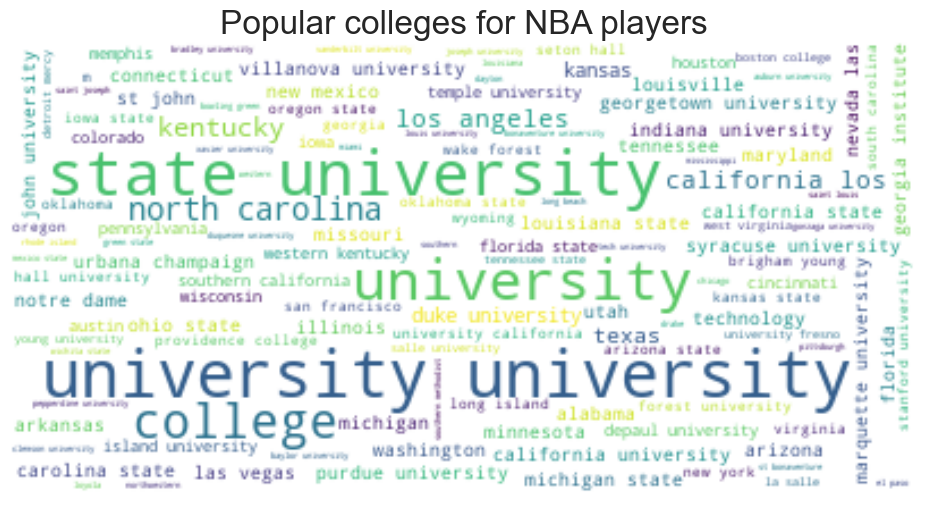

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
sns.set(rc={'figure.figsize':(11.7,8.27)})

wordcloud = WordCloud(background_color="white").generate(college_DAA)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Popular colleges for NBA players',size=24)
plt.show()

In [48]:
# !pip install keras tensorflow

# Neural network for predicting Points per game of the players

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
import keras
# from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import MinMaxScaler
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [50]:
#removal of non relevant columns
train = final_df.drop(['Player','Pos','blanl', 'blank2', 'Tm'], axis=1)

In [51]:
train= train.fillna(0)

In [52]:
#watch the dataset
train.head()

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,PF,PTS,ppg,apg,fgpg,rpg,tpg,twoppg,threeppg,dpg
5727,5727,1980.0,32.0,82.0,0.0,3143.0,25.3,0.639,0.001,0.344,...,216.0,2034.0,24.804878,4.524390,10.182927,10.804878,3.621951,10.182927,0.00,8.487805
5728,5728,1980.0,25.0,67.0,0.0,1222.0,11.0,0.511,0.003,0.258,...,118.0,362.0,5.402985,1.298507,2.283582,2.850746,0.582090,2.283582,0.00,1.925373
5729,5729,1980.0,25.0,75.0,0.0,2168.0,19.2,0.571,0.002,0.270,...,237.0,1118.0,14.906667,4.293333,6.200000,8.120000,2.906667,6.200000,0.00,6.013333
5730,5730,1980.0,31.0,80.0,80.0,2864.0,15.3,0.574,0.023,0.548,...,218.0,1131.0,14.137500,8.387500,4.787500,2.462500,3.025000,4.737500,0.05,1.725000
5731,5731,1980.0,31.0,26.0,0.0,560.0,7.4,0.524,0.000,0.833,...,66.0,86.0,3.307692,1.538462,1.038462,4.423077,1.038462,1.038462,0.00,3.307692


In [53]:
# #splitting the label
# X = train.drop(['ppg'], axis=1).as_matrix()
# y = train['ppg'].as_matrix()


# Splitting the label
X = train.drop(['ppg'], axis=1).to_numpy()
y = train['ppg'].to_numpy()




In [54]:
#Test train validation set splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# Verify shapes of the data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (12112, 55)
Shape of X_test: (3786, 55)


# Random Forest + GridSearchCV 

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Choose the type of regressor. 
RFR = RandomForestRegressor()

# Choose some parameter combinations to try
#YOU CAN TRY DIFFERENTS PARAMETERS TO FIND THE BEST MODEL
parameters = {'n_estimators': [5, 10, 100],
              #'criterion': ['mse'],
              #'max_depth': [5, 10, 15], 
              #'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1,5]
             }

# Type of scoring used to compare parameter combinations
#We have to use RandomForestRegressor's own scorer (which is R^2 score)

# Run the grid search
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, #Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RFR = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
RFR.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomForestRegressor()

In [56]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

predictions = RFR.predict(X_val)

#if we want to Re-scale, use this lines of code :
#predictions = predictions * (max_train - min_train) + min_train
#y_validation_RF = y_validation * (max_train - min_train) + min_train

#if not, keep this one:
y_validation_RF = y_val

print('R2 score = ',r2_score(y_validation_RF, predictions), '/ 1.0')
print('MSE score = ',mean_squared_error(y_validation_RF, predictions), '/ 0.0')

R2 score =  0.9971814827319551 / 1.0
MSE score =  0.0993491084965994 / 0.0


In [57]:
# test data predictions
predictions = RFR.predict(X_test)

y_test_RF = y_test

print('R2 score = ',r2_score(y_test_RF, predictions), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test_RF, predictions), '/ 0.0')

R2 score =  0.9976600094765554 / 1.0
MSE score =  0.08302616668958154 / 0.0


In [58]:
import matplotlib.pyplot as plt

/var/folders/p3/9s4dt0cj7t9cx3md223g8wh40000gn/T/ipykernel_29741/3488717495.py:2: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.



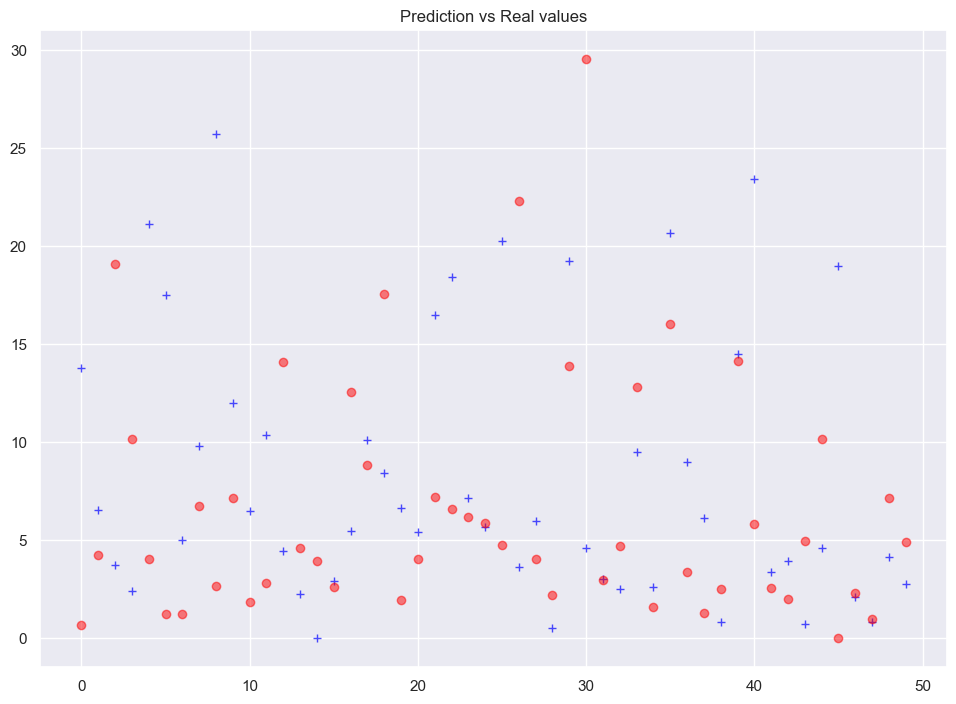

In [59]:
plt.plot(y_validation_RF[0:50], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

/var/folders/p3/9s4dt0cj7t9cx3md223g8wh40000gn/T/ipykernel_29741/1754437293.py:2: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.



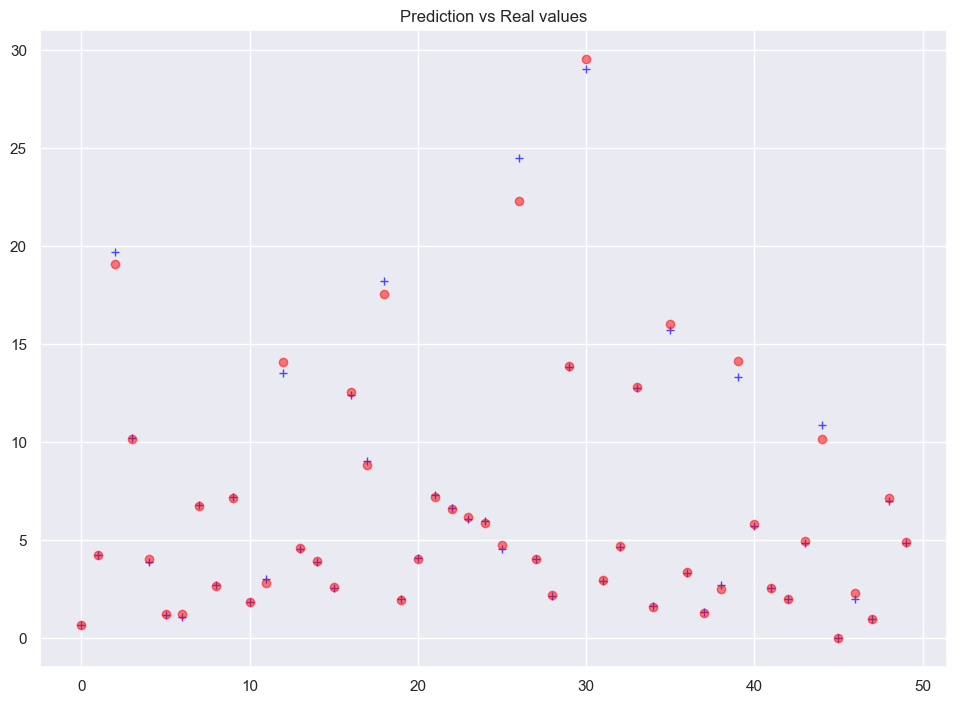

In [60]:
plt.plot(y_test_RF[0:50], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

In [61]:


# Convert data as np.array
features = np.array(X_train)
targets = np.array(y_train.reshape(y_train.shape[0],1))
features_validation= np.array(X_val)
targets_validation = np.array(y_val.reshape(y_val.shape[0],1))
features_test= np.array(X_test)
targets_test = np.array(y_test.reshape(y_test.shape[0],1))

print(features[:10])
print(targets[:10])

[[ 6.28000000e+03  1.98100000e+03  2.80000000e+01  4.60000000e+01
   0.00000000e+00  4.83000000e+02  8.40000000e+00  4.40000000e-01
   1.20000000e-02  1.39000000e-01  6.50000000e+00  1.49000000e+01
   1.07000000e+01  7.70000000e+00  1.20000000e+00  6.00000000e-01
   9.80000000e+00  1.66000000e+01 -1.00000000e-01  5.00000000e-01
   4.00000000e-01  3.90000000e-02 -3.80000000e+00 -8.00000000e-01
  -4.60000000e+00 -3.00000000e-01  6.80000000e+01  1.65000000e+02
   4.12000000e-01  0.00000000e+00  2.00000000e+00  0.00000000e+00
   6.80000000e+01  1.63000000e+02  4.17000000e-01  4.12000000e-01
   1.80000000e+01  2.30000000e+01  7.83000000e-01  2.80000000e+01
   6.50000000e+01  9.30000000e+01  2.70000000e+01  1.20000000e+01
   5.00000000e+00  1.90000000e+01  7.60000000e+01  1.54000000e+02
   5.86956522e-01  1.47826087e+00  2.02173913e+00  4.13043478e-01
   1.47826087e+00  0.00000000e+00  1.41304348e+00]
 [ 1.01670000e+04  1.99100000e+03  3.60000000e+01  7.90000000e+01
   7.50000000e+01  2.2480

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

# Building the model with the correct input dimension
model = Sequential()
model.add(Dense(200, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])  # mse: mean_squared_error
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               11200     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 25)                1275      
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 37651 (147.07 KB)
Trainable params: 37651 (147.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Step: 0 / 1000
Training MSE: 0.6886016726493835
Validation MSE: 0.687460720539093 

Step: 250 / 1000
Training MSE: 0.055305395275354385
Validation MSE: 0.051177073270082474 

Step: 500 / 1000
Training MSE: 0.004910200834274292
Validation MSE: 0.008718317374587059 

Step: 750 / 1000
Training MSE: 0.006282579619437456
Validation MSE: 0.010699203237891197 



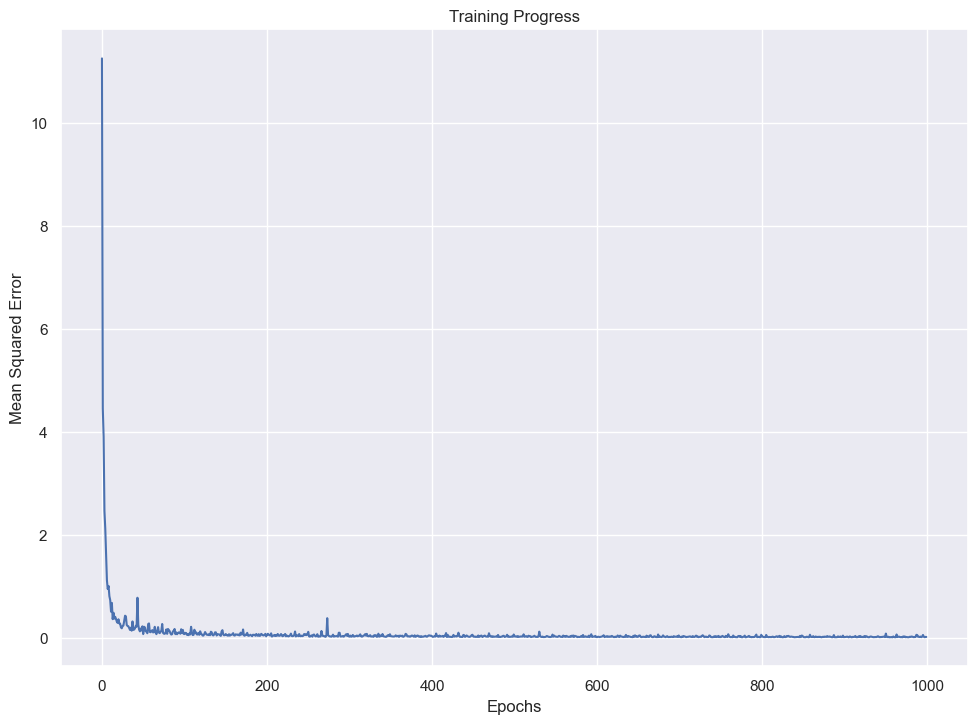

In [63]:
# Training the model
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
hist = np.array([])

for i in range(epochs_ratio):
    history = model.fit(X_train, y_train, epochs=epochs_step, batch_size=100, verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step:", i * epochs_step, "/", epochs_tot)
    score = model.evaluate(X_train, y_train, verbose=0)
    print("Training MSE:", score[1])
    score = model.evaluate(X_test, y_test, verbose=0)
    print("Validation MSE:", score[1], "\n")
    hist = np.concatenate((hist, np.array(history.history['mse'])), axis=0)
    
# Plot metrics
plt.plot(hist)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Progress')
plt.show()

In [64]:
#prediction and error checking
predictions = model.predict(features_validation, verbose=0)

print('R2 score = ',r2_score(y_val, predictions), '/ 1.0')
print('MSE score = ',mean_squared_error(y_val, predictions), '/ 0.0')


R2 score =  0.9996482599291499 / 1.0
MSE score =  0.01239838508625826 / 0.0


/var/folders/p3/9s4dt0cj7t9cx3md223g8wh40000gn/T/ipykernel_29741/2001487231.py:2: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.



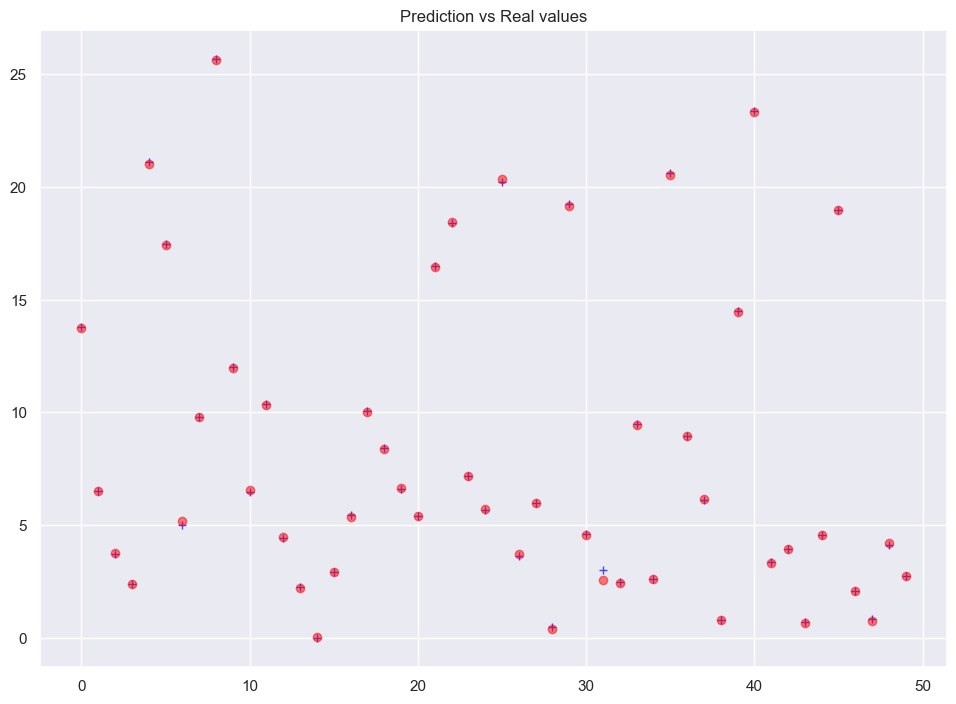

In [65]:
plt.plot(y_val[0:50], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()

In [66]:
predictions = model.predict(features_test, verbose=0)

print('R2 score = ',r2_score(y_test, predictions), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, predictions), '/ 0.0')


R2 score =  0.9996984560266583 / 1.0
MSE score =  0.01069920580620557 / 0.0


/var/folders/p3/9s4dt0cj7t9cx3md223g8wh40000gn/T/ipykernel_29741/2675245021.py:2: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.



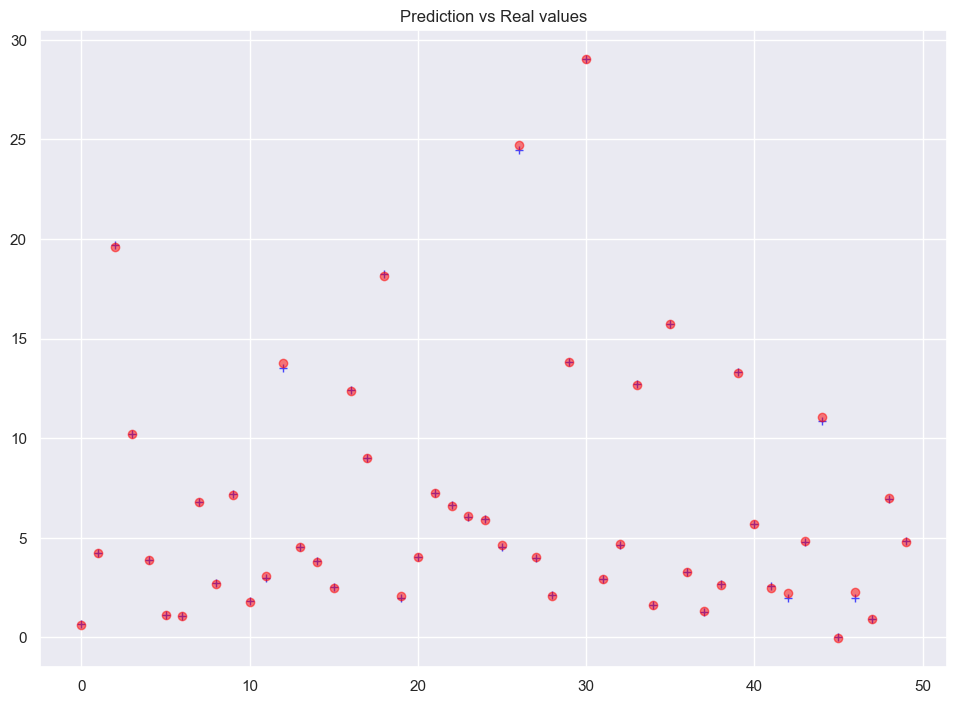

In [67]:
plt.plot(y_test[0:50], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:50], 'ro', color ='red', alpha=0.5)
plt.title('Prediction vs Real values')
plt.show()